In [3]:
from fastapi import FastAPI, UploadFile, File, HTTPException
from typing import List
import os
from datetime import datetime
import shutil
import time
from imutils import paths
import face_recognition
import pickle
import cv2
import numpy as np
import threading
import concurrent.futures
import paho.mqtt.client as mqtt
from fastapi.middleware.cors import CORSMiddleware
import uvicorn

In [10]:
import os
from imutils import paths
import face_recognition
import pickle
import cv2

print("[INFO] start processing faces...")
imagePaths = list(paths.list_images("dataset"))
knownEncodings = []
knownNames = []

[INFO] start processing faces...


In [47]:
import os
from imutils import paths
import face_recognition
import pickle
import cv2

print("[INFO] start processing faces...")
imagePaths = list(paths.list_images("dataset"))
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):
    print(f"[INFO] processing image {i + 1}/{len(imagePaths)}")
    name = imagePath.split(os.path.sep)[-2]
    
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    boxes = face_recognition.face_locations(rgb, model="hog")
    encodings = face_recognition.face_encodings(rgb, boxes)
    
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)

print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
with open("encodings.pickle", "wb") as f:
    f.write(pickle.dumps(data))

print("[INFO] Training complete. Encodings saved to 'encodings.pickle'")

[INFO] start processing faces...
[INFO] processing image 1/24


RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

In [33]:
from deepface import DeepFace

In [34]:
result = DeepFace.verify(
    img1_path="image1.jpg", 
    img2_path="image2.jpg", 
    model_name="Facenet"  # Đảm bảo sử dụng đúng mô hình
)

AttributeError: module 'deepface.modules.modeling' has no attribute 'build_model'

AttributeError: module 'deepface.modules.modeling' has no attribute 'build_model'

In [43]:
from deepface.modules import modeling

In [18]:
from imutils import paths
import cv2

In [3]:
from deepface import DeepFace

In [7]:
model = DeepFace.build_model("Facenet")

In [8]:
print(dir(model))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', 'forward', 'input_shape', 'model', 'model_name', 'output_shape']


In [23]:
import matplotlib.pyplot as plt

In [33]:
imagePaths = list(paths.list_images("dataset"))
image1 = imagePaths[21]
image2 = imagePaths[22]

In [36]:
faces1 = DeepFace.extract_faces(image1)
faces2 = DeepFace.extract_faces(image2)

In [50]:
print(face_recognition.load_image_file(image1))

[[[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 ...

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]]


In [49]:
biden_encoding = face_recognition.face_encodings(known_image)[0]

RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

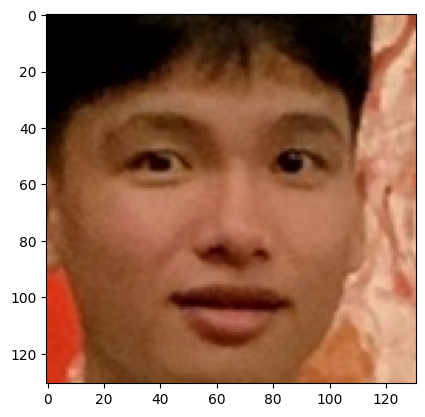

In [42]:
plt.imshow(img2)

In [ ]:
DeepFace.find()

In [ ]:
DeepFace.verify(image1, image2, model_name="Facenet")

{'verified': False,
 'distance': 0.45059705299008157,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 262,
   'y': 188,
   'w': 243,
   'h': 243,
   'left_eye': (418, 266),
   'right_eye': (327, 266)},
  'img2': {'x': 255,
   'y': 201,
   'w': 225,
   'h': 225,
   'left_eye': None,
   'right_eye': None}},
 'time': 5.82}

In [1]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.19.0
Keras version: 3.9.1


DeepFace.modeling()